In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from mpl_toolkits.mplot3d import Axes3D


In [85]:
# Load the new data from test6_64_16.csv
# data_new7 = pd.read_csv("bezier_arch_4_test_2.csv", header=None)
# data_new7 = pd.read_csv("bezier_arch_4_test_3_100_waypoints-5_37.csv", header=None)
# data_new7 = pd.read_csv("bezier_arch_4_test4_100_waypoints_drone_6-7_17.csv", header=None)

original_points = pd.read_csv("test_rounded_100_points.csv", header=None)

nn_points = pd.read_csv("bezier_arch_4_test_2_100_waypoints-5_20.csv", header=None)

# dont select the first 430 points
nn_points2 = nn_points.iloc[430:1320,:]

In [68]:
len(nn_points)

1550

In [19]:
def make_plot(data_new7, title):
    # set the column names
    data_new7.columns = ["x", "y", "z"]

    # sample every 10th row of the data into a new dataframe
    # data_new7_sampled = data_new7.iloc[::10, :]
    data_new7_sampled = data_new7

    # Create a 3D plot for the extracted data
    fig_new7 = plt.figure(figsize=(10, 8))
    ax_new7 = fig_new7.add_subplot(111, projection='3d')

    # Plot the positions
    ax_new7.scatter(data_new7_sampled.iloc[:, 0], data_new7_sampled.iloc[:, 1], data_new7_sampled.iloc[:, 2], s=50, color='red', depthshade=True)

    # Setting the labels and title
    ax_new7.set_xlabel('X')
    ax_new7.set_ylabel('Y')
    ax_new7.set_zlabel('Z')
    ax_new7.set_title(title)

    # # flip the x axis
    # ax_new7.invert_xaxis()

    # flip the y axis
    ax_new7.invert_yaxis()

    # Display the plot
    plt.show()

In [38]:
# # clear the figure
# plt.clf()

<Figure size 640x480 with 0 Axes>

In [5]:
def data_new7_sampled(data_new7, name):
    # Create a 3D plot for animation
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter([], [], [])

    # Set axis limits
    ax.set_xlim(data_new7_sampled.iloc[:, 0].min(), data_new7_sampled.iloc[:, 0].max())
    ax.set_ylim(data_new7_sampled.iloc[:, 1].min(), data_new7_sampled.iloc[:, 1].max())
    ax.set_zlim(data_new7_sampled.iloc[:, 2].min(), data_new7_sampled.iloc[:, 2].max())

    # Animation function
    def update(frame):
        sc._offsets3d = (data_new7_sampled.iloc[:frame, 0], data_new7_sampled.iloc[:frame, 1], data_new7_sampled.iloc[:frame, 2])
        return sc,

    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=len(data_new7_sampled), blit=False)

    # Save the animation as a GIF
    ani.save(f'{name}.gif', writer='pillow')

    plt.close(fig)

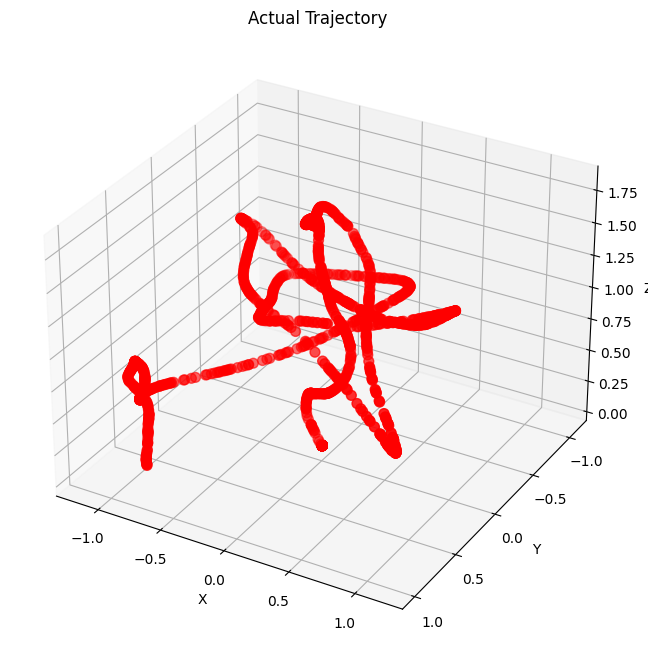

In [20]:
make_plot(nn_points, title= "Actual Trajectory")

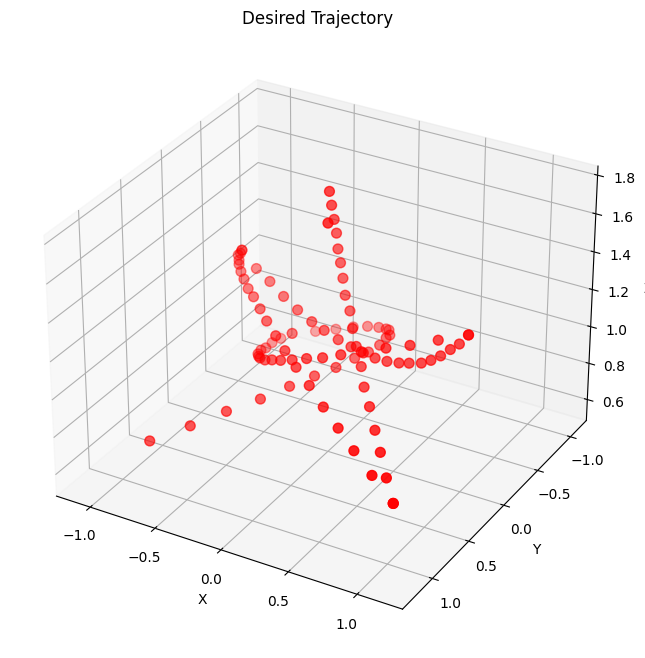

In [16]:
make_plot(original_points, title= "Desired Trajectory")

In [64]:
import plotly.express as px



def make_interative_plot(data_new7, title):
    # set the column names
    data_new7.columns = ["x", "y", "z"]

    # sample every 10th row of the data into a new dataframe
    # data_new7_sampled = data_new7.iloc[::10, :]
    data_new7_sampled = data_new7

    # Sample data
    x = -data_new7_sampled.iloc[:, 0]
    y = -data_new7_sampled.iloc[:, 1]
    z = data_new7_sampled.iloc[:, 2]

    # Create an interactive 3D scatter plot
    fig = px.scatter_3d(x=x, y=y, z=z, title=title)

    fig.update_traces(marker=dict(size=2))  # Adjust the size as needed


    # Customize the plot
    fig.update_layout(scene=dict(xaxis_title='X Label', yaxis_title='Y Label', zaxis_title='Z Label'))

    # # Invert the Y-axis
    # fig.update_layout(yaxis_autorange='reversed')

    # Define the camera angle
    camera = dict(
        eye=dict(x=-1.25, y=1.25, z=1.25),  # Adjust the camera's position
        center=dict(x=0, y=0, z=0),         # Adjust the point the camera is looking at
        up=dict(x=0, y=0, z=2)              # Adjust the camera's up vector
    )

    # reduce height of the camera
    fig.update_layout(scene_camera=camera)


    # Show the plot
    fig.show()


In [89]:
make_interative_plot(nn_points2, title= "Actual Trajectory")

In [88]:
make_interative_plot(original_points, title= "Desired Trajectory")